In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [44]:
bank=pd.read_csv("bank-full.csv",sep=';')
bank


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [45]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
bank.shape

(45211, 17)

In [47]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
bank.shape

(45211, 17)

In [49]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [50]:
bank.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [51]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [52]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [30]:
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""primary"";""no"";608;""no"";""no"";""cellular"";12;""aug"";267;1;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""primary"";""no"";608;""no"";""no"";""cellular"";13;""nov"";210;1;93;1;""success"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""secondary"";""no"";156;""no"";""no"";""cellular"";4;""nov"";298;2;82;4;""other"";""no""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""secondary"";""no"";5;""no"";""no"";""cellular"";24;""aug"";143;2;-1;0;""unknown"";""no""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";108;""no"";""no"";""cellular"";10;""aug"";167;1;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";108;""no"";""no"";""cellular"";8;""sep"";169;1;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";108;""no"";""no"";""cellular"";9;""feb"";92;1;183;1;""success"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";348;""no"";""no"";""cellular"";5;""may"";443;4;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";35;""no"";""no"";""telephone"";21;""aug"";104;2;-1;0;""unknown"";""no""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_18;""student"";""single"";""unknown"";""no"";3;""no"";""no"";""cellular"";25;""aug"";130;2;-1;0;""unknown"";""yes""",...,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_89;""retired"";""married"";""tertiary"";""no"";553;""no"";""no"";""telephone"";19;""aug"";2027;5;-1;0;""unknown"";""no""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_90;""retired"";""divorced"";""primary"";""no"";712;""no"";""no"";""telephone"";3;""mar"";557;1;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""_90;""retired"";""divorced"";""secondary"";""no"";1;""no"";""no"";""cellular"";13;""feb"";152;3;-1;0;""unknown"";""yes""","age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";

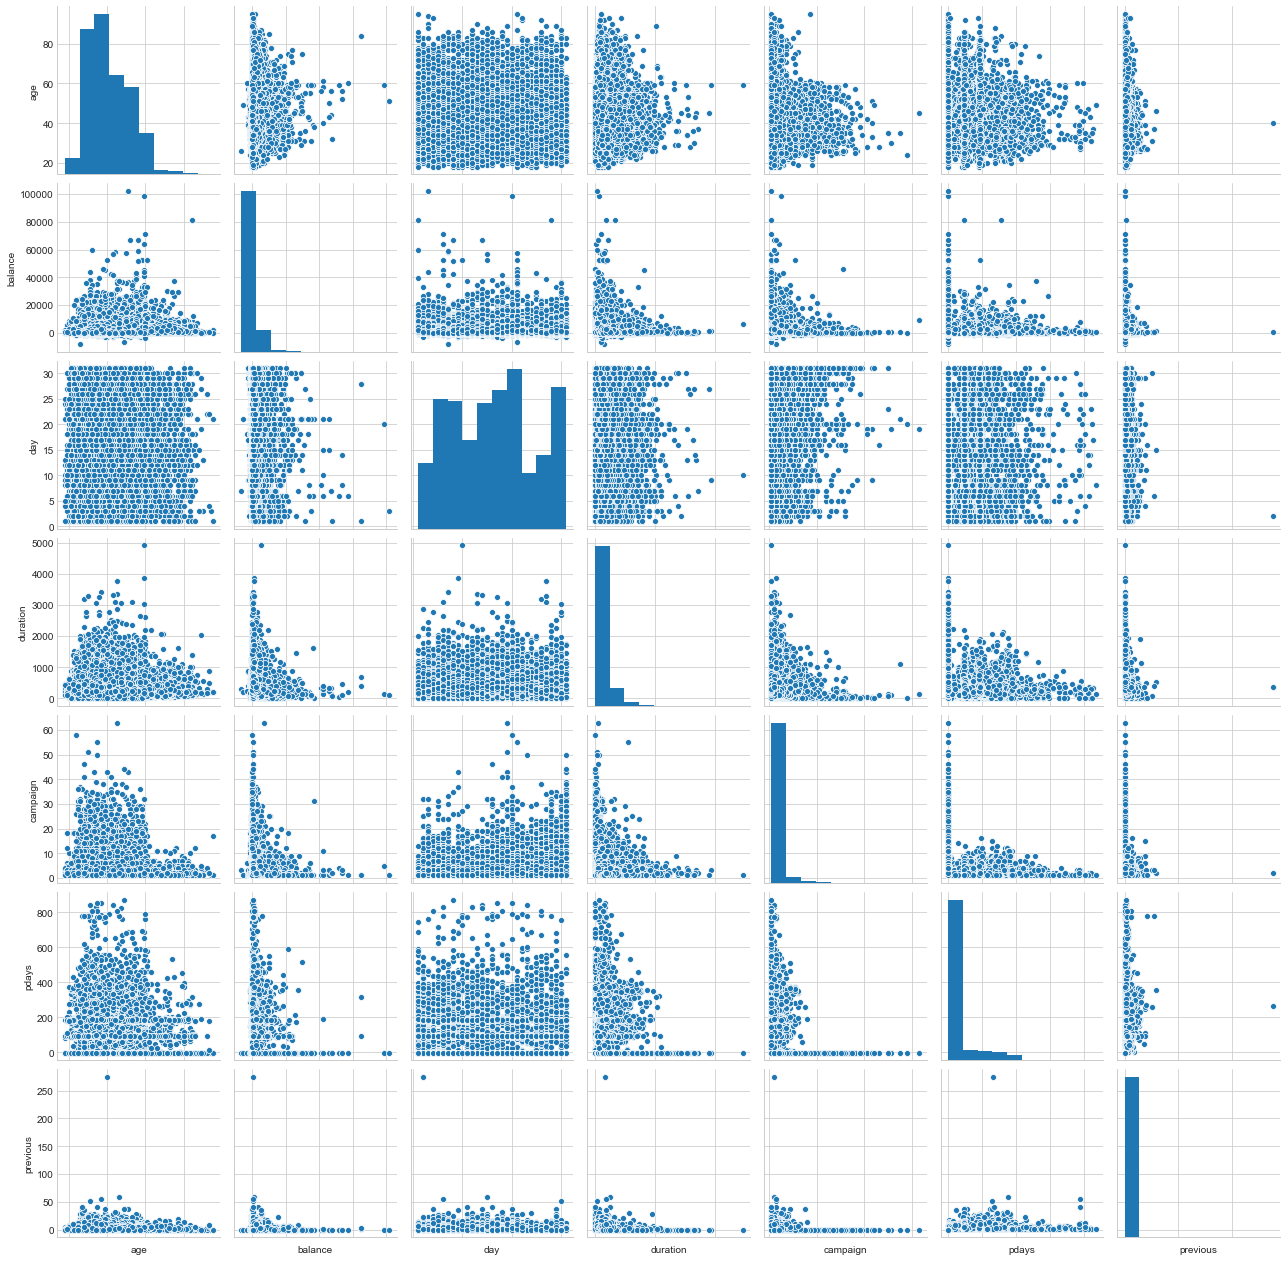

In [53]:

g = sns.pairplot(bank)
g.set(xticklabels=[])
plt.show()

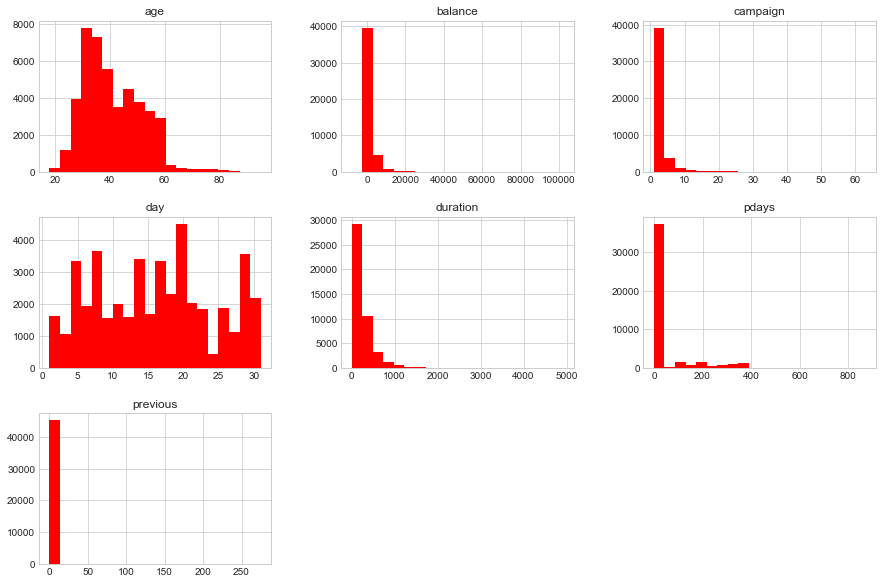

In [54]:

plt.style.use('seaborn-whitegrid')
bank.hist(bins=20, figsize=(15,10), color='red')
plt.show()


In [57]:
label_encoder = preprocessing.LabelEncoder()
bank["job"] = label_encoder.fit_transform(bank["job"])
bank["marital"] = label_encoder.fit_transform(bank["marital"])
bank["education"] = label_encoder.fit_transform(bank["education"])  
bank["default"] = label_encoder.fit_transform(bank["default"])
bank["housing"] = label_encoder.fit_transform(bank["housing"]) 
bank["loan"] = label_encoder.fit_transform(bank["loan"])
bank["contact"] = label_encoder.fit_transform(bank["contact"])
bank["month"] = label_encoder.fit_transform(bank["month"])
bank["poutcome"] = label_encoder.fit_transform(bank["poutcome"])
bank["y"] = label_encoder.fit_transform(bank["y"])



In [58]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


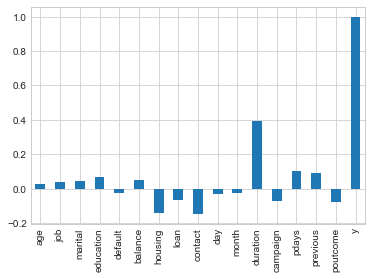

In [59]:
bank.corr()['y'][:].plot.bar()

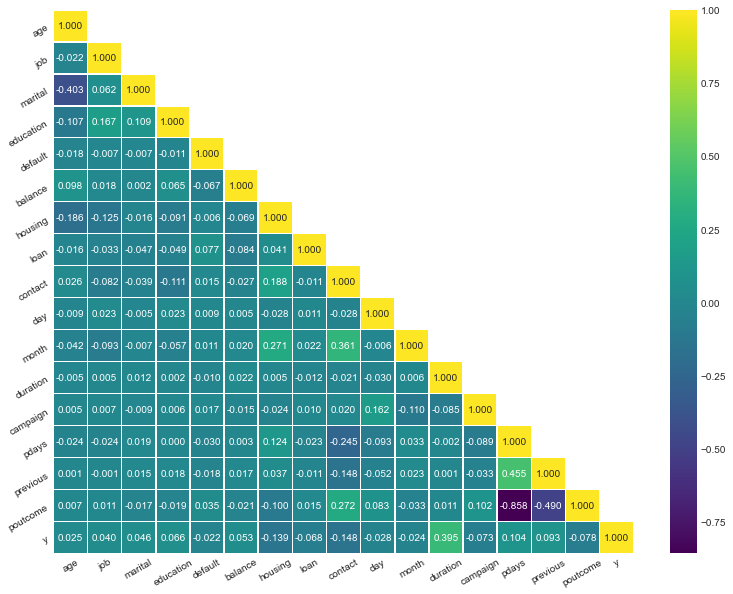

In [60]:
fig, ax = plt.subplots(figsize=(13,10))

mask = np.zeros_like(bank.corr())
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(bank.corr(), annot=True,mask=mask, cmap='viridis',linewidths=0.5,ax=ax, fmt='.3f')

rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)


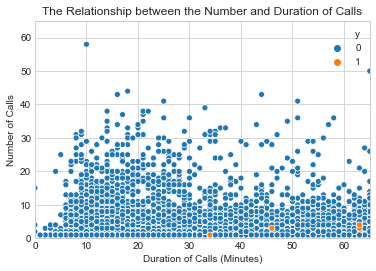

In [61]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = bank,
                     hue = 'y')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
plt.show()


In [62]:
bank1= bank.iloc[:,[0,1,2,3,4,5,6,7,16]]


In [65]:
bank

,age,job,marital,education,default,balance,housing,loan,y
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,47,1,1,3,0,1506,1,0,0
4,33,11,2,3,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,1
45207,71,5,0,0,0,1729,0,0,1
45208,72,5,1,1,0,5715,0,0,1
45209,57,1,1,1,0,668,0,0,0


In [66]:
bank1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
y            0
dtype: int64

In [67]:
# Dividing our data into input and output variables 
X = bank1.iloc[:,:-2]
X


,age,job,marital,education,default,balance,housing
0,58,4,1,2,0,2143,1
1,44,9,2,1,0,29,1
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,1
4,33,11,2,3,0,1,0
...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0
45207,71,5,0,0,0,1729,0
45208,72,5,1,1,0,5715,0
45209,57,1,1,1,0,668,0


In [68]:
Y = bank1.iloc[:,-1]
Y


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [69]:
# # Build The Model

# ## Splitting into training and testing model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.3, random_state=0)


In [70]:
print(X_train.shape)


(31647, 7)


In [71]:
print(X_test.shape)

(13564, 7)


In [72]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)


LogisticRegression()

In [73]:
print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

Training Accuracy :	  0.8831168831168831


In [74]:
print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))


Testing Accuracy :	   0.8820406959598939


In [75]:

y_pred = lr_clf.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [76]:
metrics.confusion_matrix(y_pred, y_test)


array([[11964,  1595],
       [    5,     0]], dtype=int64)

In [77]:
cm = confusion_matrix(y_test,y_pred)
print (cm)


[[11964     5]
 [ 1595     0]]


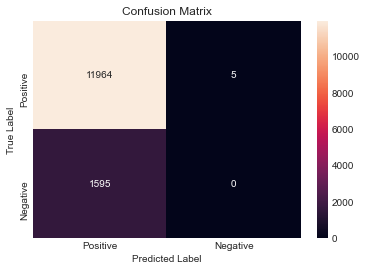

In [78]:
cm = confusion_matrix(y_test, y_pred)

class_label = ["Positive", "Negative"]
cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



In [88]:
# ## ROC Curve
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc
y_predictProb = lr_clf.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

roc_auc = auc(fpr, tpr)

print("auc :-",roc_auc)


auc :- 0.6258929904596026


In [93]:

auc


<function sklearn.metrics._ranking.auc(x, y)>

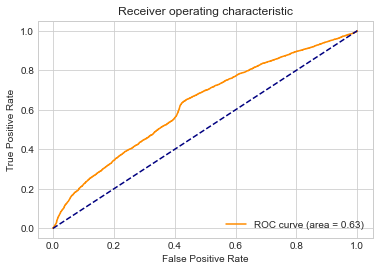

In [94]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")



In [95]:
prob=lr_clf.predict_proba(X_train)
prob=prob[:,1]

new_pred= pd.DataFrame({'actual': y_test,"pred":0})


In [96]:

new_pred

,actual,pred
14001,0,0
32046,1,0
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [97]:
cm_new=confusion_matrix(new_pred.actual,new_pred.pred)
cm_new


array([[11969,     0],
       [ 1595,     0]], dtype=int64)

In [98]:
print(classification_report(new_pred.actual,new_pred.pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.00      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
